# Quick start

We will guide you through the main features of `niimpy`. This guide assumes that you have basic knowledge of Python. Also, please refers to the [installation](https://niimpy.readthedocs.io/en/latest/installation/) page for installing `niimpy`.

This guide provides an example of reading and handling Aware battery data. The tutorial will guide you through 4 basic steps of a data analysis pipeline:

* [Reading](#section_0)
* [Preprocessing](#section_1)
* [Visualization](#section_2)
* [Basic analysis](#section_3)

In [8]:
# Setting up plotly environment
import plotly.io as pio
pio.renderers.default = "png"

In [2]:
import numpy as np
import niimpy
from config import config
from niimpy.exploration.eda import punchcard, missingness
from niimpy.preprocessing import battery

## Reading <a class="anchor" id="section_0"></a>
`niimpy` provides a simple function to read data from csv and sqlite database. We will read a csv file containing 1 month of battery data from an individual.

In [3]:
df = niimpy.read_csv(config.MULTIUSER_AWARE_BATTERY_PATH, tz='Europe/Helsinki')
df.head()

,user,device,time,battery_level,battery_status,battery_health,battery_adaptor,datetime
2020-01-09 02:20:02.924999936+02:00,jd9INuQ5BBlW,3p83yASkOb_B,1.578529e+09,74,3,2,0,2020-01-09 02:20:02.924999936+02:00
2020-01-09 02:21:30.405999872+02:00,jd9INuQ5BBlW,3p83yASkOb_B,1.578529e+09,73,3,2,0,2020-01-09 02:21:30.405999872+02:00
2020-01-09 02:24:12.805999872+02:00,jd9INuQ5BBlW,3p83yASkOb_B,1.578529e+09,72,3,2,0,2020-01-09 02:24:12.805999872+02:00
2020-01-09 02:35:38.561000192+02:00,jd9INuQ5BBlW,3p83yASkOb_B,1.578530e+09,72,2,2,0,2020-01-09 02:35:38.561000192+02:00
2020-01-09 02:35:38.953000192+02:00,jd9INuQ5BBlW,3p83yASkOb_B,1.578530e+09,72,2,2,2,2020-01-09 02:35:38.953000192+02:00


## Preprocessing <a class="anchor" id="section_1"></a>

There are various ways to handle battery data. For example, you can extract the gaps between consecutive battery timestamps.

In [4]:
gaps = battery.battery_gaps(df)
gaps.head()

,user,device,time,battery_level,battery_status,battery_health,battery_adaptor,datetime,tvalue,delta
2020-01-09 02:20:02.924999936+02:00,jd9INuQ5BBlW,3p83yASkOb_B,1.578529e+09,74,3,2,0,2020-01-09 02:20:02.924999936+02:00,2020-01-09 02:20:02.924999936+02:00,0 days 00:00:00
2020-01-09 02:21:30.405999872+02:00,jd9INuQ5BBlW,3p83yASkOb_B,1.578529e+09,73,3,2,0,2020-01-09 02:21:30.405999872+02:00,2020-01-09 02:21:30.405999872+02:00,0 days 00:01:27.480999936
2020-01-09 02:24:12.805999872+02:00,jd9INuQ5BBlW,3p83yASkOb_B,1.578529e+09,72,3,2,0,2020-01-09 02:24:12.805999872+02:00,2020-01-09 02:24:12.805999872+02:00,0 days 00:02:42.400000
2020-01-09 02:35:38.561000192+02:00,jd9INuQ5BBlW,3p83yASkOb_B,1.578530e+09,72,2,2,0,2020-01-09 02:35:38.561000192+02:00,2020-01-09 02:35:38.561000192+02:00,0 days 00:11:25.755000320
2020-01-09 02:35:38.953000192+02:00,jd9INuQ5BBlW,3p83yASkOb_B,1.578530e+09,72,2,2,2,2020-01-09 02:35:38.953000192+02:00,2020-01-09 02:35:38.953000192+02:00,0 days 00:00:00.392000


`niimpy` can also extract the amount of battery data found within an interval.

In [5]:
occurences = battery.battery_occurrences(df, hours=1)
occurences.head()

,start,end,occurrences
2020-01-09 02:20:02.924999936+02:00,2020-01-09 02:20:02.924999936+02:00,2020-01-09 03:20:02.924999936+02:00,59.0
2020-01-09 03:20:02.924999936+02:00,2020-01-09 03:20:02.924999936+02:00,2020-01-09 04:20:02.924999936+02:00,50.0
2020-01-09 04:20:02.924999936+02:00,2020-01-09 04:20:02.924999936+02:00,2020-01-09 05:20:02.924999936+02:00,86.0
2020-01-09 05:20:02.924999936+02:00,2020-01-09 05:20:02.924999936+02:00,2020-01-09 06:20:02.924999936+02:00,36.0
2020-01-09 06:20:02.924999936+02:00,2020-01-09 06:20:02.924999936+02:00,2020-01-09 07:20:02.924999936+02:00,40.0


## Visualization <a class="anchor" id="section_2"></a>

`niimpy` provides a selection of visualization tools curated for exploring behavioural data. For example, you can examine the frenquency of battery level in specified interval.

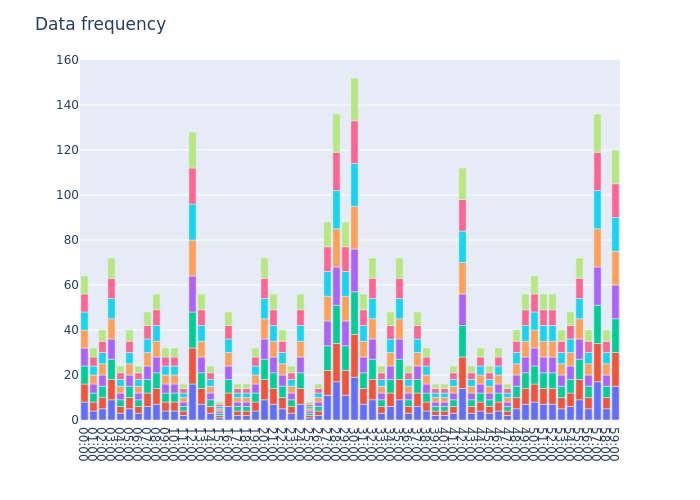

In [6]:
fig = missingness.bar_count(df, columns=['battery_level'], sampling_freq='T')
fig.show()

In addition, you can analyze the battery level at each sampling interval by using a punchcard plot.

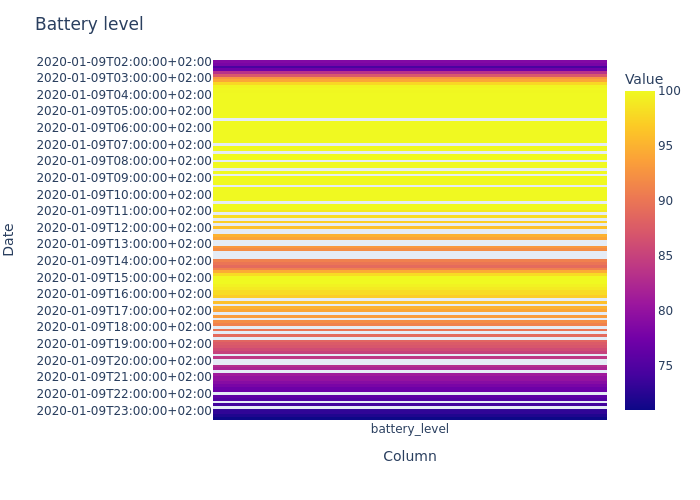

In [7]:
fig = punchcard.punchcard_plot(df,
                                   user_list=['jd9INuQ5BBlW'],
                                   columns=['device', 'battery_level'],
                                   resample='10T',
                                   title="Battery level")
fig.show()

For more information, refer to the [Exploration](https://niimpy.readthedocs.io/en/latest/api/niimpy.exploration/) section.

## Basic analysis <a class="anchor" id="section_3"></a>
